**Pytrend** Library for get data from google trend





In [1]:
!pip install pytrends

In [3]:
from pytrends.request import TrendReq
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import networkx as nx 
%matplotlib inline
import plotly.express as px

In [4]:
##Install thai font
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2020-12-01 10:33:39--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-12-01 10:33:39--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.006s  

2020-12-01 10:33:40 (16.1 MB/s) - ‘thsara

In [5]:
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family= 'TH Sarabun New')

In [6]:
pytrends = TrendReq()

Trending search an API methods for show keywords which most popular in the last few day. We are also can select the Countries we are interested in. Let's try to explore in Thailand.

In [7]:
trending_searches_df = pytrends.trending_searches(pn='thailand')
print(trending_searches_df)

                                         0
0                                ชุดไปรเวท
1                                 เลสเตอร์
2                  เวสต์แฮม พบ แอสตันวิลลา
3                                  ธันวาคม
4                                ลอตเตอรี่
5                                    ธนชาต
6                             เลขดังงวดนี้
7                                      ร.9
8                         หวยไทยรัฐ1/12/63
9                         เชลซี พบ สเปอร์ส
10                                     หวย
11                                   แมนยู
12                                     SCB
13                              หมึกบลูริง
14  เชียงราย ยูไนเต็ด พบ เมลเบิร์น วิคตอรี
15                                   เชลซี
16                          วัดพระบาทน้ำพุ
17                             จันทรุปราคา
18          วันหยุดราชการเดือนธันวาคม 2563
19                                 กรุงศรี


Let's see the trending of today by today_searches function.

In [8]:
today_searches_df = pytrends.today_searches(pn='TH')
print(today_searches_df.head(20))

0                  หวย1/12/63
1                   ลอตเตอรี่
2                   ชุดไปรเวท
3                    เลสเตอร์
4     เวสต์แฮม พบ แอสตันวิลลา
5                   ดวงวันนี้
6                1ธันวาคม2563
7                         รวย
8                         ร.9
9                       ธนชาต
10                วันเอดส์โลก
11             หวยดัง 1/12/63
12               บ้านพิษณุโลก
Name: query, dtype: object


Let's continue with interest_over_time API method. An API method which return the historical of defined keyword with score each past day. We will try to explore popularity of two big e-commerce companies in Thailand.

In [9]:
## Define keyword
kw_sp = ['shopee']
# Create payload and capture API tokens. Only needed for interest_over_time, interest_by_region and related_queries
pytrends.build_payload(kw_sp, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '') 

In [ ]:
df_sp = pytrends.interest_over_time()
df_sp['store'] = 'Shopee'
df_sp.rename(columns={'shopee' : 'Score'}, inplace= True)
df_sp.head(5)

In [11]:
pytrends2 = TrendReq()

In [12]:
kw_lz = ['lazada']
pytrends2.build_payload(kw_lz, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '')

In [ ]:
df_lz = pytrends2.interest_over_time()
df_lz['store'] = 'Lazada'
df_lz.rename(columns={'lazada' : 'Score'}, inplace= True)
df_lz.head(5)

In [ ]:
## Bring both tables together for plot the graph
df_ecom = pd.concat([df_sp, df_lz])
df_ecom

As you see from the graph both of these e-commerce companies has highest search score on November 11 since that day there was a big sale event 11.11. If we try to look on another day shopee is more popular than lazada. But that makes us unable to judge because we have to survey a number of users on there applications too. 

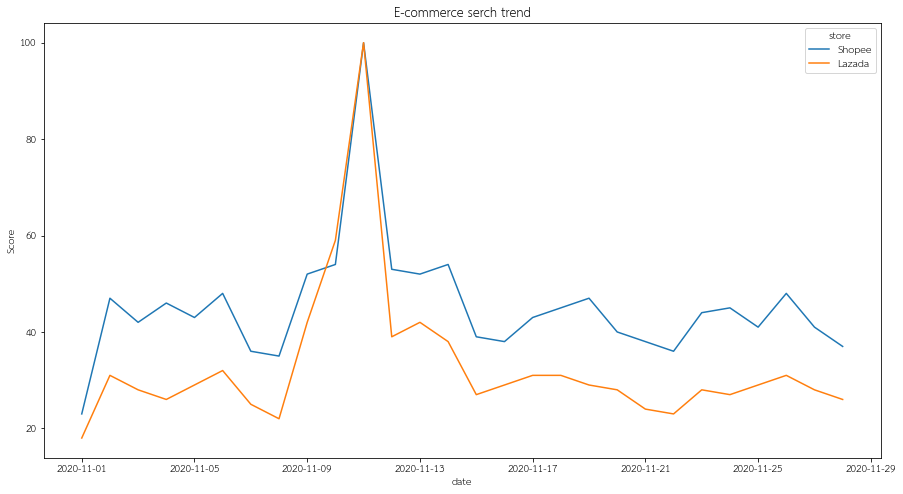

In [24]:
fig = plt.figure(figsize=(15, 8))
sns.lineplot(x= df_ecom.index, y= df_ecom['Score'], hue= df_ecom['store'])
plt.title('E-commerce serch trend')
plt.savefig('E-com search trend.png')

Next let's get the related queries of our keywords by related_queries function where top will return the top overall keywords and rising return the keyword which becoming popular. We will try to explore what users search about shopee and lazada.  

In [26]:
topicsp = pytrends.related_queries()

In [27]:
## Take data from dict to dataframe
sp_rising = pd.DataFrame.from_dict(topicsp['shopee']['rising'])

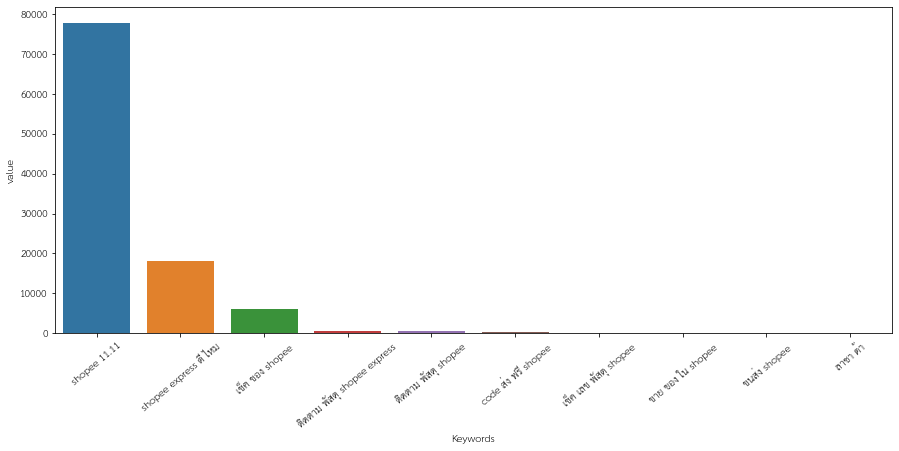

In [28]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= sp_rising['query'], y= sp_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')
plt.savefig('sp-rising.png')

In [30]:
## Take data from dict to dataframe
sp_top = pd.DataFrame.from_dict(topicsp['shopee']['top'])

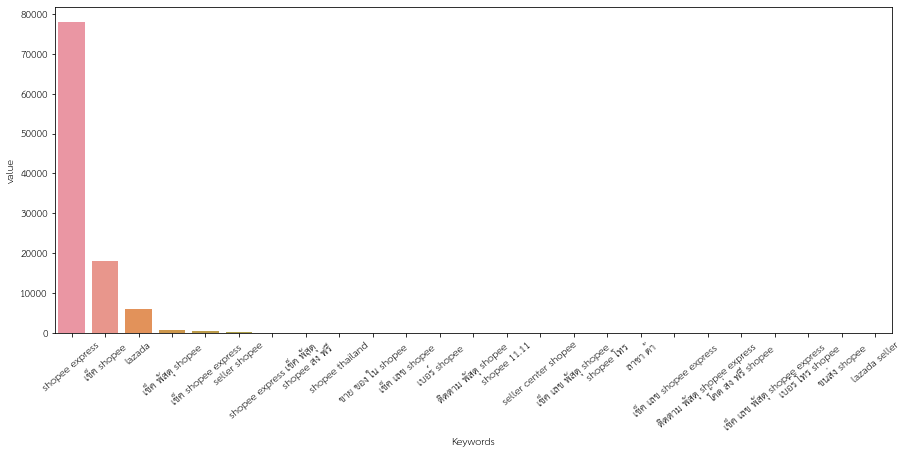

In [31]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= sp_top['query'], y= sp_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')
plt.savefig('sp-top.png')

In [32]:
topiclz = pytrends2.related_queries()

In [33]:
## Take data from dict to dataframe
lz_rising = pd.DataFrame.from_dict(topiclz['lazada']['rising'])

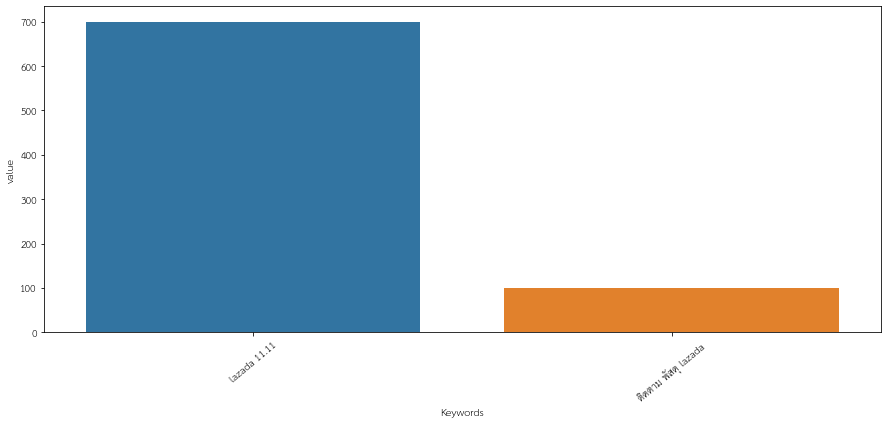

In [35]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= lz_rising['query'], y= lz_rising['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')
plt.savefig('lz-rising.png')

In [36]:
## Take data from dict to dataframe
lz_top = pd.DataFrame.from_dict(topiclz['lazada']['top'])

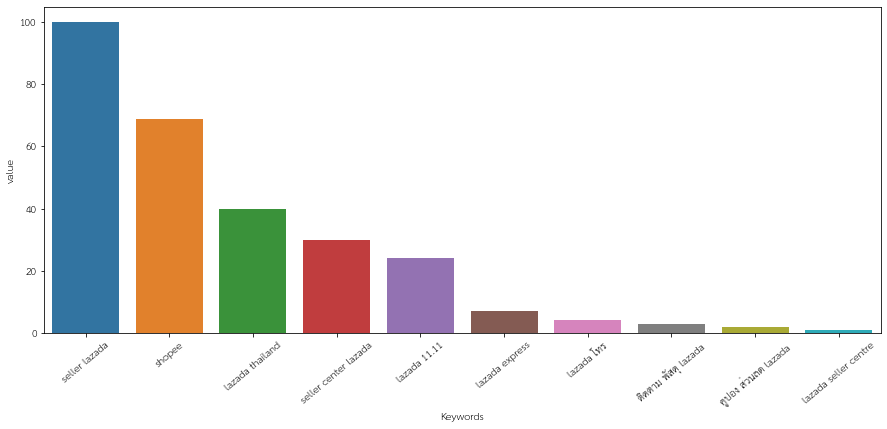

In [38]:
fig = plt.figure(figsize=(15, 6))
sns.barplot(x= lz_top['query'], y= lz_top['value'])
plt.xticks(rotation= 40)
plt.xlabel('Keywords')
plt.savefig('lz-top.png')

After we explored the related keywords of both e-commerce platform. We can see that the top rank of rising keywords are about 11.11 promotion same. In the section of top related keywords. For shopee mostly users were search about shopee express which are transportation service of shopee, contact channel and promotion. For lazada mostly users were search about lazada seller(How to become a store on lazada platform), contact channel, promotion and transportation service(track number check). It seems like   shopee, users are searching about transportation services more than lazada. However, some of those keyword may indicate 
what services will the company need to improve further.

And last we'll get the keywords from related queries to continue search. This time we'll try to change the keyword to iphone 12 which recently launch a few day ago.

In [60]:
pytrends3 = TrendReq()

In [74]:
##Define new key word
seed_kw = 'iphone 12'
kw_list = [seed_kw]
pytrends3.build_payload(kw_list, cat= 0, timeframe= 'today 1-m', geo= 'TH', gprop= '')

queries = pytrends3.related_queries()
df_ip = pd.DataFrame.from_dict(queries['iphone 12']['top'])
df_ip['Keywords'] = seed_kw

In [76]:
#prepare the list for the next search
kw_list = df_ip['query'].head(5).to_list()
org_kw_list = kw_list
kw_list = [kw.replace(seed_kw, '') for kw in kw_list]
kw_list = [kw.replace('', '') for kw in kw_list]
kw_dict = dict(zip(kw_list, org_kw_list))

In [77]:
pytrends3.build_payload(kw_list, cat=0, timeframe='today 1-m' , geo='TH', gprop='')
expanded_queries = pytrends3.related_queries()

In [ ]:
expanded_queries

From the iphone 12 keyword rising result you can see user mostly search keyword with telecommunication company name. Which those companies are the official iphone dealer. For now AIS is the most popular, followed by TRUEMOVE and DTAC.

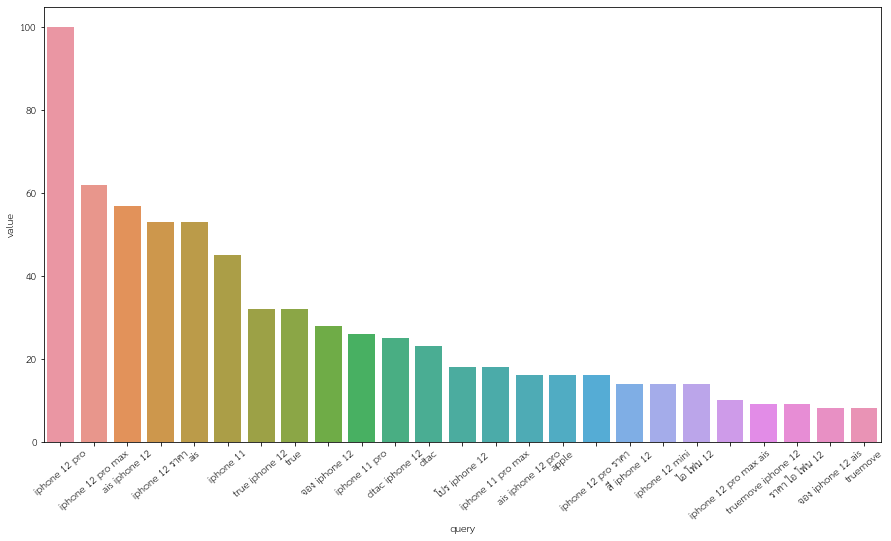

In [79]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(x= df_ip['query'], y= df_ip['value'])
plt.xticks(rotation= 40)
plt.savefig('iphone.png')

In [95]:
##Prepare dataframe for plot network graph
df_ip12 = pd.DataFrame.from_dict(queries['iphone 12']['top'])
df_ip12['keyword'] = 'iphone 12'

In [80]:
df_q1 = pd.DataFrame.from_dict(expanded_queries['ais']['top'])
df_q1['keyword'] = 'ais iphone 12'

In [82]:
df_q2 = pd.DataFrame.from_dict(expanded_queries['pro']['top'])
df_q2['keyword'] = 'iphone 12 pro'

In [83]:
df_q3 = pd.DataFrame.from_dict(expanded_queries['pro max']['top'])
df_q3['keyword'] = 'iphone 12 pro max'

In [84]:
df_q4 = pd.DataFrame.from_dict(expanded_queries['ราคา']['top'])
df_q4['keyword'] = 'iphone 12 ราคา'

In [ ]:
## Bring dataframe which contain each keywords together
df_con = pd.concat([df_ip12, df_q1, df_q2, df_q3, df_q4])
df_con

This graph show you the top 5 expanded queries from iphone 12 keyword.

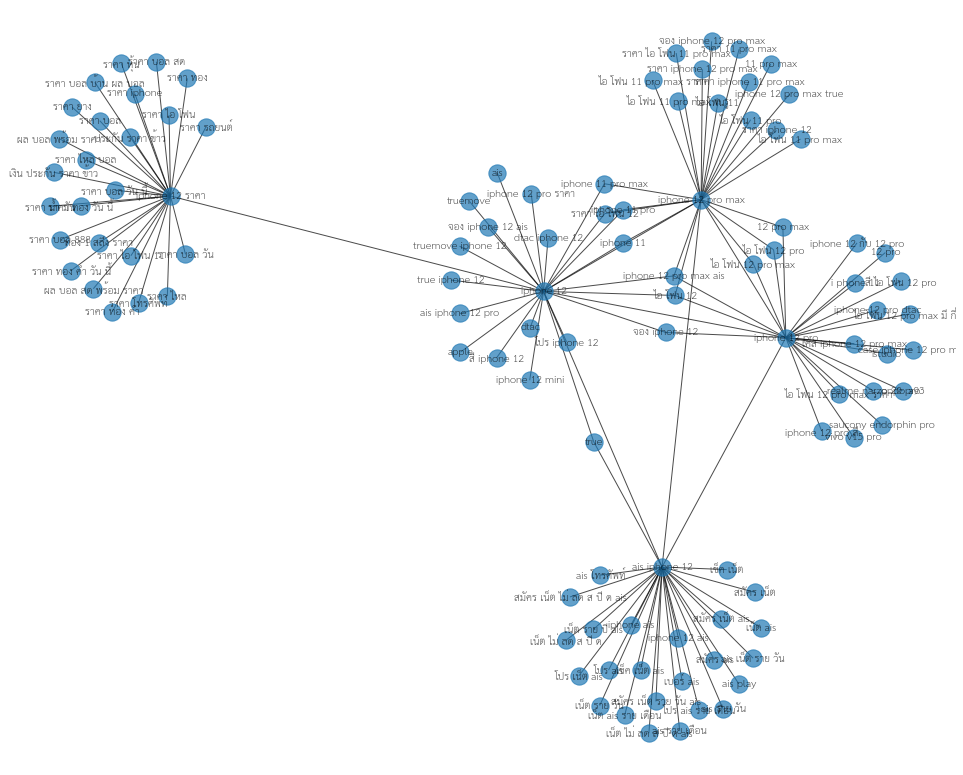

In [105]:
fig, ax=plt.subplots(figsize=(17, 14))
G=nx.from_pandas_edgelist(df_con ,source='keyword', target='query')
pos = nx.spring_layout(G,k=10,iterations=20)  
labels_params = {"font_family":"TH Sarabun New", "alpha":.7, "font_size":10 }
nx.draw_spring(G, with_labels=True, **labels_params)
plt.savefig('iphone-network_.png')
plt.show()

**Credit :** 
*   https://medium.com/@thanachart.rit/%E0%B9%80%E0%B8%82%E0%B8%B5%E0%B8%A2%E0%B8%99-python-%E0%B8%95%E0%B9%88%E0%B8%AD-google-trends-api-%E0%B9%81%E0%B8%A5%E0%B8%B0%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B9%81%E0%B8%9A%E0%B8%9A-network-graph-a9be0f7b0d28

*   https://predictivehacks.com/get-google-trends-using-python/



